# Visualize selected genes

In [1]:
import pandas as pd
import numpy as np
from pydeseq2.dds import DeseqDataSet
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
import umap.umap_ as umap

# Import utilities
import os
import sys
os.chdir("/Volumes/kueck/PublicDataAnalysis/CASCAM_style_subtype_classification/src/preprocessing")
# os.getcwd() not working as expected, so need to set wd manually (update as needed).
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../'))
sys.path.append(parent_dir)

from utilities import Subtype, convert_subtype_to_int

/Users/Ryan/venv/general_purpose_venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
batch_corrected_counts_path = (
    "../../data/batch_corrected_data/pycombat_batch_corrected_counts.tsv"
)

combined_metadata_path = "../../data/formatted_rnaseq_data/metadata.tsv"

selected_genes_path = "../../data/differential_analysis/pycombat_batch_corrected_dex_selected_genes.tsv"

## Load datasets

In [5]:
corrected_expression = pd.read_csv(batch_corrected_counts_path, sep="\t", index_col=0)
log2_corrected_expression = np.log2(corrected_expression + 1)

metadata = pd.read_csv(combined_metadata_path, sep="\t", index_col=0)
display(metadata.head())

selected_genes = pd.read_csv(selected_genes_path, sep="\t", index_col=0)

# Subset features to be only the selected genes
features = log2_corrected_expression[log2_corrected_expression.index.isin(selected_genes.index.tolist())]
display(features.head())

,dataset_name,original_sample_name,type
sample_id,,,
GSE189553_0_CCC,GSE189553,CCC_1,CCC
GSE189553_1_CCC,GSE189553,CCC_2,CCC
GSE189553_2_CCC,GSE189553,CCC_3,CCC
GSE189553_3_CCC,GSE189553,CCC_4,CCC
GSE189553_4_CCC,GSE189553,CCC_5,CCC


,GSE189553_0_CCC,GSE189553_1_CCC,GSE189553_2_CCC,GSE189553_3_CCC,GSE189553_4_CCC,GSE189553_5_CCC,GSE189553_6_CCC,GSE189553_7_CCC,GSE189553_8_CCC,GSE189553_9_CCC,...,TCGA_181_HGSC,TCGA_182_HGSC,TCGA_183_HGSC,TCGA_184_HGSC,TCGA_185_HGSC,TCGA_186_HGSC,TCGA_187_HGSC,TCGA_188_HGSC,TCGA_189_HGSC,TCGA_190_HGSC
Gene,,,,,,,,,,,,,,,,,,,,,
AACSP1,1.000000,3.321928,2.584963,2.321928,5.930737,1.000000,1.000000,1.000000,1.584963,2.000000,...,1.000000,0.000000,2.584963,1.000000,2.000000,1.000000,0.000000,1.000000,3.321928,0.000000
AADACL3,3.459432,6.247928,1.584963,2.807355,1.584963,1.584963,1.584963,1.584963,1.584963,1.584963,...,0.000000,0.000000,0.000000,1.584963,1.584963,1.000000,1.584963,2.321928,5.672425,0.000000
AADAT,6.918863,6.643856,6.988685,7.022368,8.149747,5.584963,4.754888,5.882643,6.129283,4.857981,...,5.459432,6.599913,6.507795,8.379378,5.727920,5.554589,7.515700,5.129283,6.882643,5.426265
ABAT,8.988685,9.900867,8.686501,8.842350,9.231221,6.965784,6.882643,7.209453,7.149747,6.614710,...,8.071462,9.019591,6.794416,8.426265,9.082149,8.194757,10.133142,7.813781,6.375039,5.247928
ABHD14B,10.788718,11.288866,11.162391,11.272047,10.963619,9.709084,9.487840,9.897845,9.588715,9.531381,...,9.935165,10.193525,8.829723,9.471675,9.768184,9.335390,8.308339,10.366322,10.079485,10.665336


UMAP of selected genes after PyComBat correction

In [6]:
# Fit and transform the data using UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding = reducer.fit_transform(features.T.values)

# Create a DataFrame for the UMAP results
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'], index=features.columns)

/Users/Ryan/venv/general_purpose_venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


/var/folders/nn/pb4b1kzx12vbp6sgl69b77rw0000gp/T/ipykernel_41486/3257604820.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_df['UMAP1'], embedding_df['UMAP2'], c=embedding_df['colors'], cmap='Spectral', alpha=0.5, edgecolor='w', linewidth=0.5)


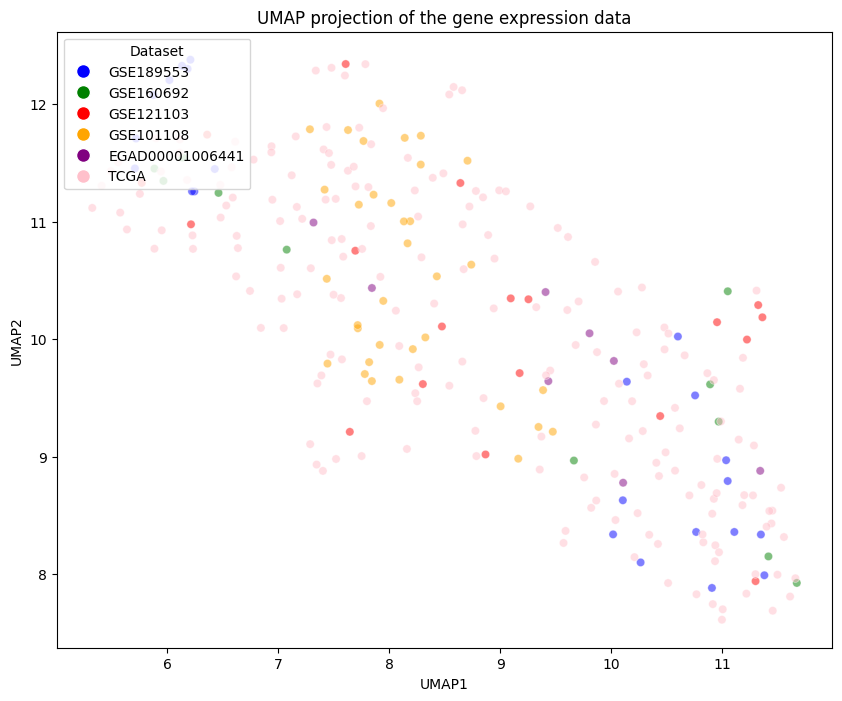

/var/folders/nn/pb4b1kzx12vbp6sgl69b77rw0000gp/T/ipykernel_41486/3257604820.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_df['UMAP1'], embedding_df['UMAP2'], c=embedding_df['colors'], cmap='Spectral', alpha=0.5, edgecolor='w', linewidth=0.5)


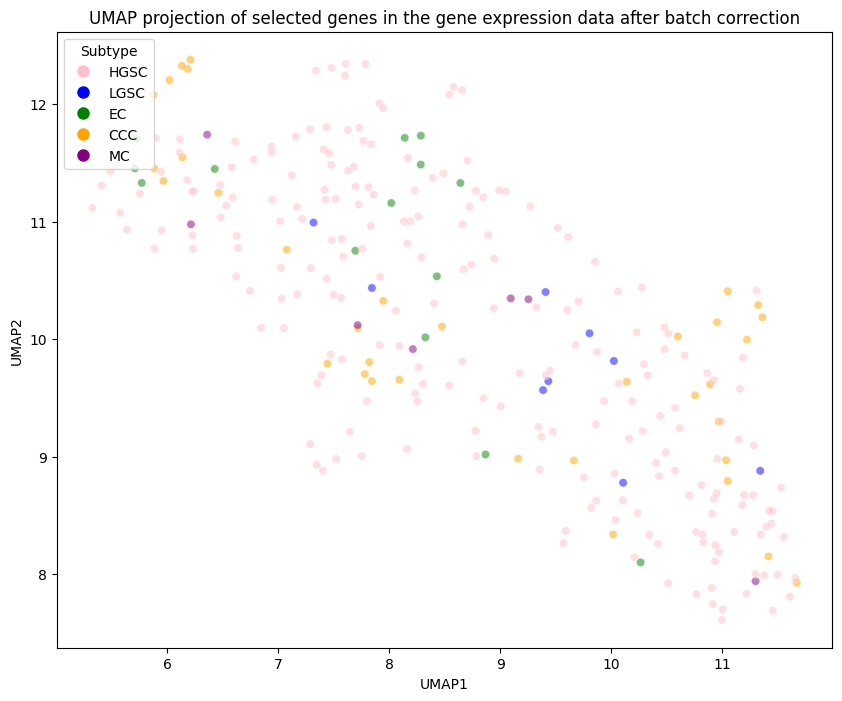

In [7]:
################ Plot with dataset colored ################

# Check that metadata columns and log2_expression_df rows are the same
assert (metadata.index == features.columns).all()

# Coloring
datasets = metadata['dataset_name'].values
color_map = {
    'GSE189553': 'blue',
    'GSE160692': 'green',
    'GSE121103': 'red',
    'GSE101108': 'orange',
    'EGAD00001006441': 'purple',
    'TCGA': 'pink'
}
colors = [color_map[dataset] for dataset in datasets]
embedding_df['colors'] = colors

# Plot the UMAP result
plt.figure(figsize=(10, 8))
plt.scatter(embedding_df['UMAP1'], embedding_df['UMAP2'], c=embedding_df['colors'], cmap='Spectral', alpha=0.5, edgecolor='w', linewidth=0.5)

# Create custom legend for colors
unique_datasets = metadata['dataset_name'].unique()
color_legend_labels = unique_datasets
color_legend_handles = [Line2D([0], [0], marker='o', color='w', label=dataset,
                               markerfacecolor=color_map[dataset], markersize=10)
                        for _, dataset in enumerate(color_legend_labels)]
plt.legend(handles=color_legend_handles, title='Dataset', loc='upper left')

plt.title('UMAP projection of the gene expression data')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

################ Plot with subtype colored ################
# Check that metadata columns and features rows are the same
assert (metadata.index == features.columns).all()

# Coloring
subtypes = metadata['type'].values
color_map = {
    'HGSC': 'pink',
    'LGSC': 'blue',
    'EC': 'green',
    'CCC': 'orange',
    'MC': 'purple'
}
colors = [color_map[subtype] for subtype in subtypes]
embedding_df['colors'] = colors

# Plot the UMAP result
plt.figure(figsize=(10, 8))
plt.scatter(embedding_df['UMAP1'], embedding_df['UMAP2'], c=embedding_df['colors'], cmap='Spectral', alpha=0.5, edgecolor='w', linewidth=0.5)
# Create custom legend for colors
color_legend_labels = list(Subtype.__members__.keys())
color_legend_handles = [Line2D([0], [0], marker='o', color='w', label=label,
                               markerfacecolor=color_map[label], markersize=10)
                        for _, label in enumerate(color_legend_labels)]
plt.legend(handles=color_legend_handles, title='Subtype', loc='upper left')

plt.title('UMAP projection of selected genes in the gene expression data after batch correction')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()
